In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from scipy import stats
import seaborn as sns; sns.set()

In [2]:
red = pd.read_csv("winequality-red.csv", sep = ";")
white = pd.read_csv("winequality-white.csv", sep = ";")

In [3]:
red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [5]:
a = red['fixed acidity']
b = red['volatile acidity']
c = red['citric acid']
d = red['residual sugar']
e = red['chlorides']
f = red['free sulfur dioxide']
g = red['total sulfur dioxide']
h = red['density']
i = red['pH']
j = red['sulphates']
k = red['alcohol']
l = red['quality']

### Red and Wine Fixed Acidity vs. Volatile Acidity

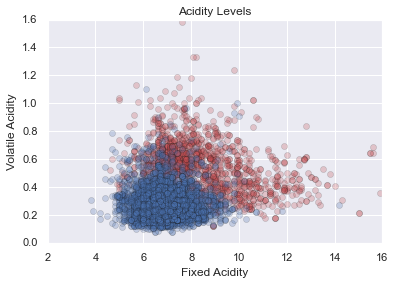

In [6]:
plt.plot(red['fixed acidity'], red['volatile acidity'], 'o', color='r', alpha=.25)
plt.plot(white['fixed acidity'], white['volatile acidity'], 'o', alpha=.25)

plt.title('Acidity Levels')
plt.xlabel('Fixed Acidity')
plt.ylabel('Volatile Acidity')
plt.show()

### Red and Wine Free Sulfur Dioxide vs. Total Sulfur Dioxide

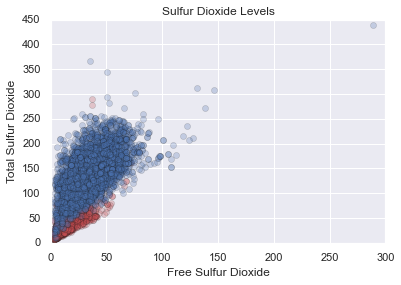

In [7]:
plt.plot(red['free sulfur dioxide'], red['total sulfur dioxide'], 'o', color='r', alpha=.25)
plt.plot(white['free sulfur dioxide'], white['total sulfur dioxide'], 'o', alpha=.25)

plt.title('Sulfur Dioxide Levels')
plt.xlabel('Free Sulfur Dioxide')
plt.ylabel('Total Sulfur Dioxide')
plt.show()

### Red Wine Quality Values Comparison

<AxesSubplot:ylabel='quality'>

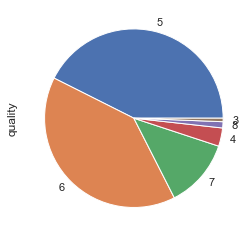

In [8]:
red.quality.value_counts().plot(kind = 'pie')

### White Wine Quality Values Comparison

<AxesSubplot:ylabel='quality'>

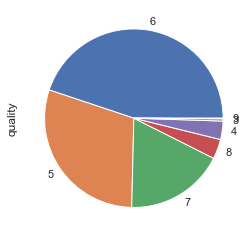

In [9]:
white.quality.value_counts().plot(kind = 'pie')

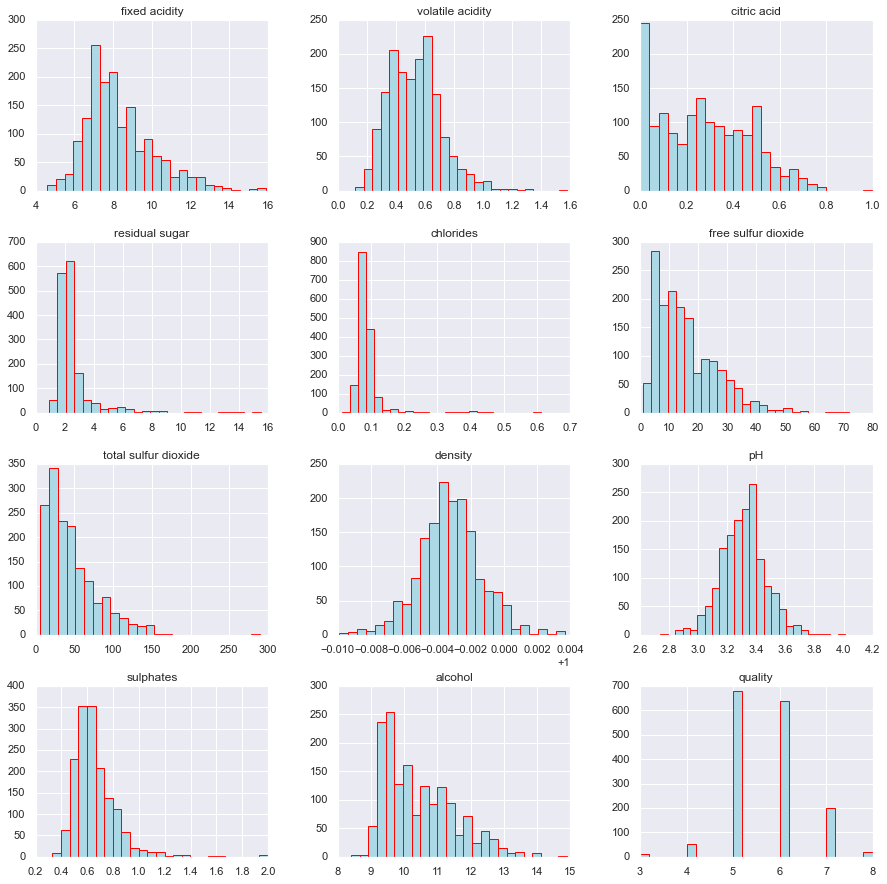

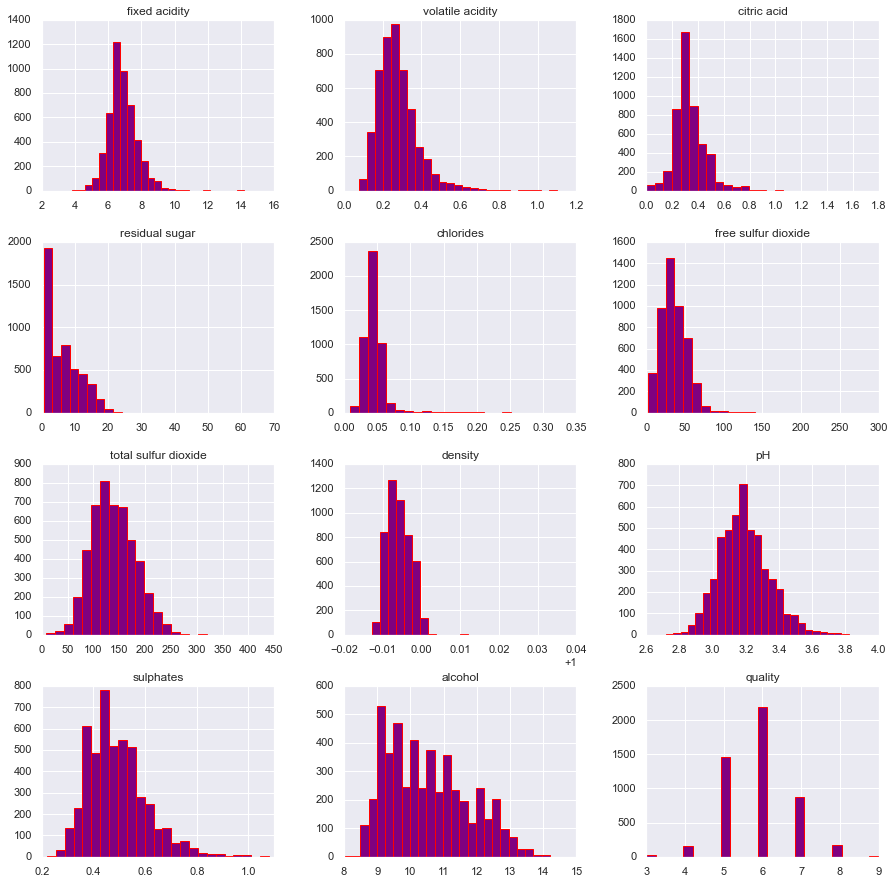

In [10]:
red.hist(bins=25, figsize = (15,15),color = "lightblue",ec = "red")
white.hist(bins=25, figsize = (15,15), color = "purple", ec = "red")
plt.show()

### Correlations for Red Wine

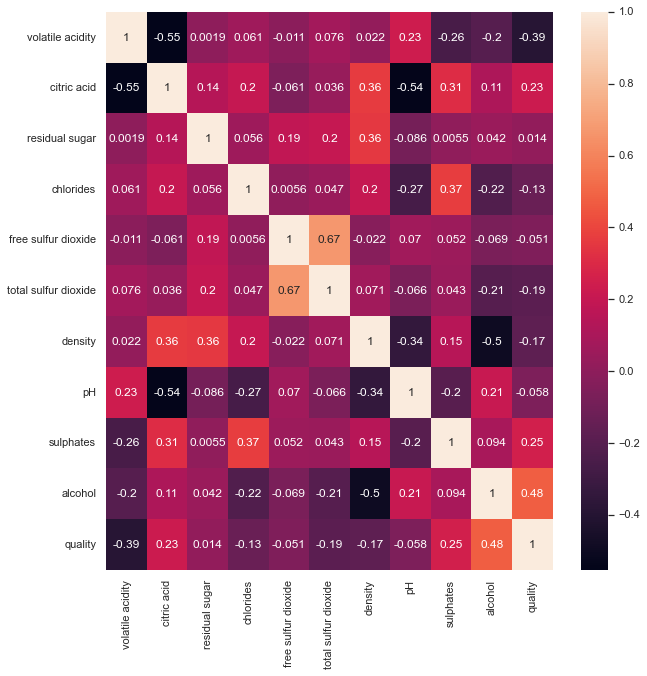

In [11]:
df = pd.DataFrame (red)
rwine_corr = df.iloc[:,1:]

correlation_mat = rwine_corr.corr()

plt.figure(figsize = (10,10))
sns.heatmap(correlation_mat, annot = True)

plt.show()

### Correlation for white wine

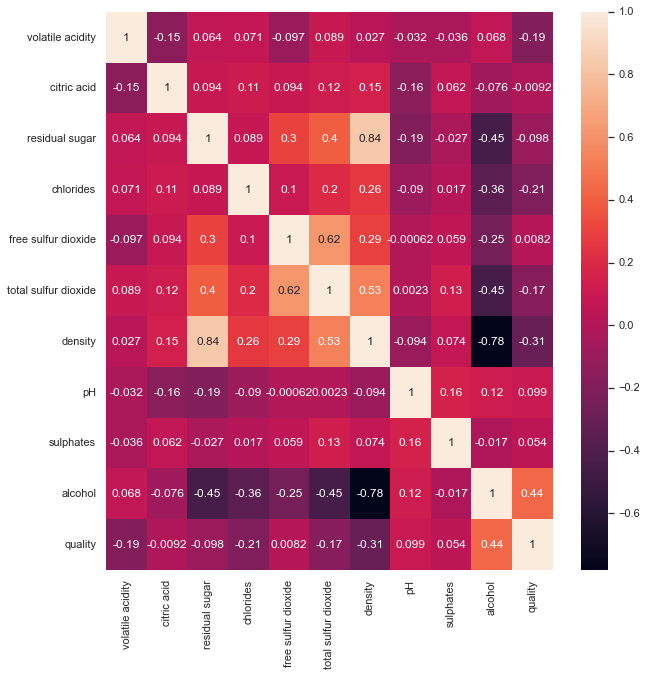

In [12]:
df = pd.DataFrame (white)
whitwine_corr = df.iloc[:,1:]

correlation_mat = whitwine_corr.corr()

plt.figure(figsize = (10,10))
sns.heatmap(correlation_mat, annot = True)

plt.show()

### Combining the data

In [13]:
redEdit = red
redEdit['wine'] = 'red'
whiteEdit = white
whiteEdit['wine'] = 'white'
wine = pd.concat([redEdit, whiteEdit])
wine = wine.reset_index()
wine

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


### Correlation for all wine data

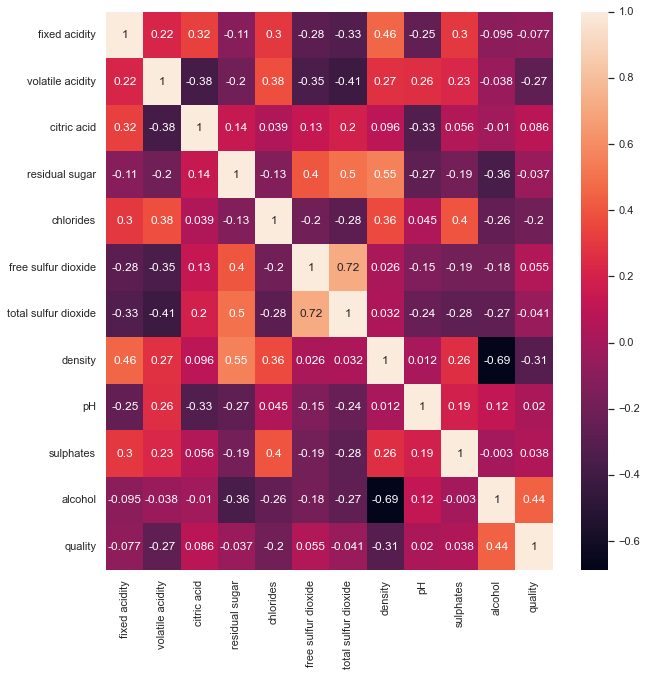

In [14]:
df = pd.DataFrame (wine)
wine_corr = df.iloc[:,1:]

correlation_mat = wine_corr.corr()

plt.figure(figsize = (10,10))
sns.heatmap(correlation_mat, annot = True)

plt.show()

### GaussianNB to predict what type of wine a sample is

In [15]:
X_wine = wine.drop('wine', axis = 1)
Y_wine = wine['wine']
Xtrain, Xtest, ytrain, ytest = train_test_split(X_wine, Y_wine, test_size = 0.2, random_state=42)

In [16]:
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [17]:
accuracy_score(ytest, y_model)

0.9646153846153847

### GaussianNB to predict quality of wine

In [18]:
X_qual = wine.drop(['quality', 'wine'], axis = 1)
Y_qual = wine['quality']
Xtrain2, Xtest2, ytrain2, ytest2 = train_test_split(X_qual, Y_qual, test_size = 0.2, random_state=42)

In [19]:
model2 = GaussianNB()
model2.fit(Xtrain2, ytrain2)
y_model2 = model2.predict(Xtest2)

In [20]:
accuracy_score(ytest2, y_model2)

0.4815384615384615

### Keras Neural Network to predict quality of wine (Deep Learning)

In [21]:
modelK2 =  keras.Sequential([
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(1)])

In [22]:
modelK2.compile(optimizer='adam', loss='mae')
modelK2.fit(Xtrain2, ytrain2, batch_size=1, epochs=10)

Epoch 1/10
5197/5197 [==============================] - 13s 2ms/step - loss: 1.8614
Epoch 2/10
5197/5197 [==============================] - 12s 2ms/step - loss: 0.6807
Epoch 3/10
5197/5197 [==============================] - 12s 2ms/step - loss: 0.7544
Epoch 4/10
5197/5197 [==============================] - 13s 2ms/step - loss: 0.6874
Epoch 5/10
5197/5197 [==============================] - 13s 2ms/step - loss: 0.6802
Epoch 6/10
5197/5197 [==============================] - 12s 2ms/step - loss: 0.6753
Epoch 7/10
5197/5197 [==============================] - 12s 2ms/step - loss: 0.6733
Epoch 8/10
5197/5197 [==============================] - 11s 2ms/step - loss: 0.6739
Epoch 9/10
5197/5197 [==============================] - 11s 2ms/step - loss: 0.6712
Epoch 10/10
5197/5197 [==============================] - 10s 2ms/step - loss: 0.6721


In [23]:
y_QualPred = modelK2.predict(Xtest2).round()

In [24]:
accuracy_score(y_QualPred, ytest2)

0.4592307692307692